In [167]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib.patheffects as pe
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import rc

import matplotlib.dates as mdates
import matplotlib.cbook as cbook
import datetime as dt
import matplotlib.ticker as mtick

plt.style.use('https://raw.githubusercontent.com/benckj/mpl_style/main/uzh.mplstyle')
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

#plt.style.use('uzh')
plt.rcParams["font.family"] = "serif"
plt.rcParams['text.usetex'] = True

In [168]:
def V_HDL(delta):
    return (delta)+1

def V_LP(delta):
    return 2*(((delta)**0.5))


In [169]:
x = np.linspace(0,3,1000)

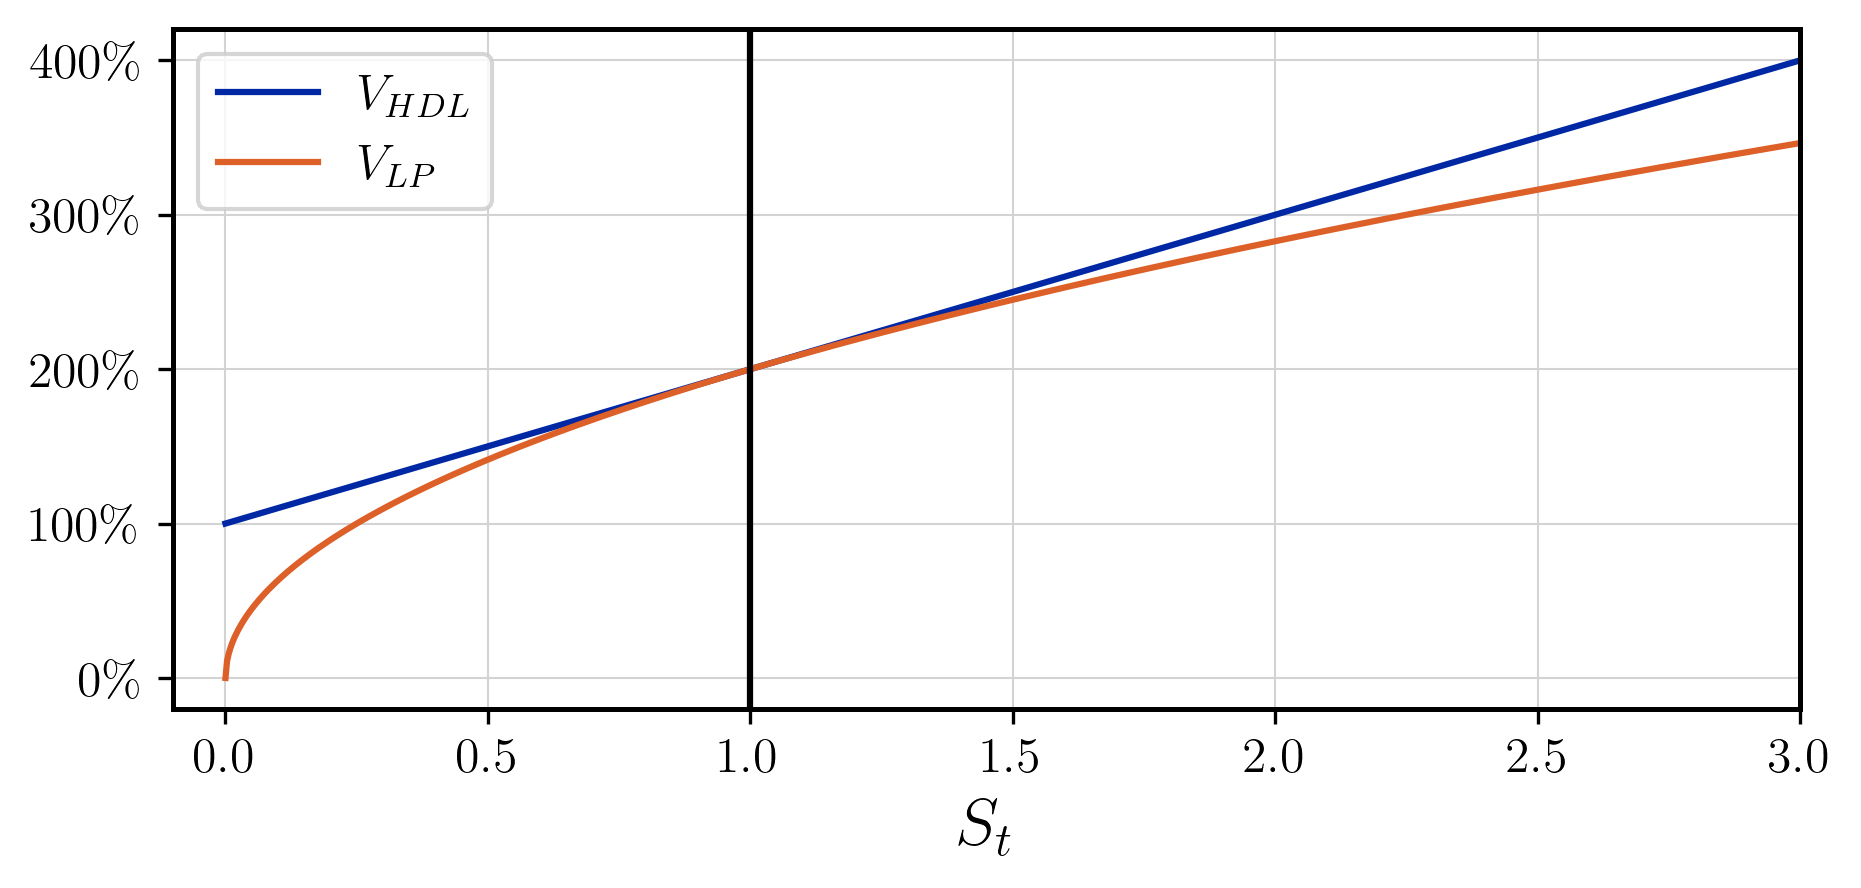

In [170]:
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(7,3),dpi =300)

ax.plot(x, V_HDL(x), label='$V_{HDL}$')
ax.plot(x, V_LP(x), label='$V_{LP}$')
ax.axvline(1, c = 'k')
ax.legend()
ax.set_xlim(-0.1,3)
ax.set_axisbelow(True)
ax.set_xlabel('$S_t$')
ax.grid(zorder=100, lw =0.5, color = 'lightgray')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))

In [143]:
def impermanent_loss(delta):
    return (V_LP(delta)-V_HDL(delta))/(V_HDL(delta))

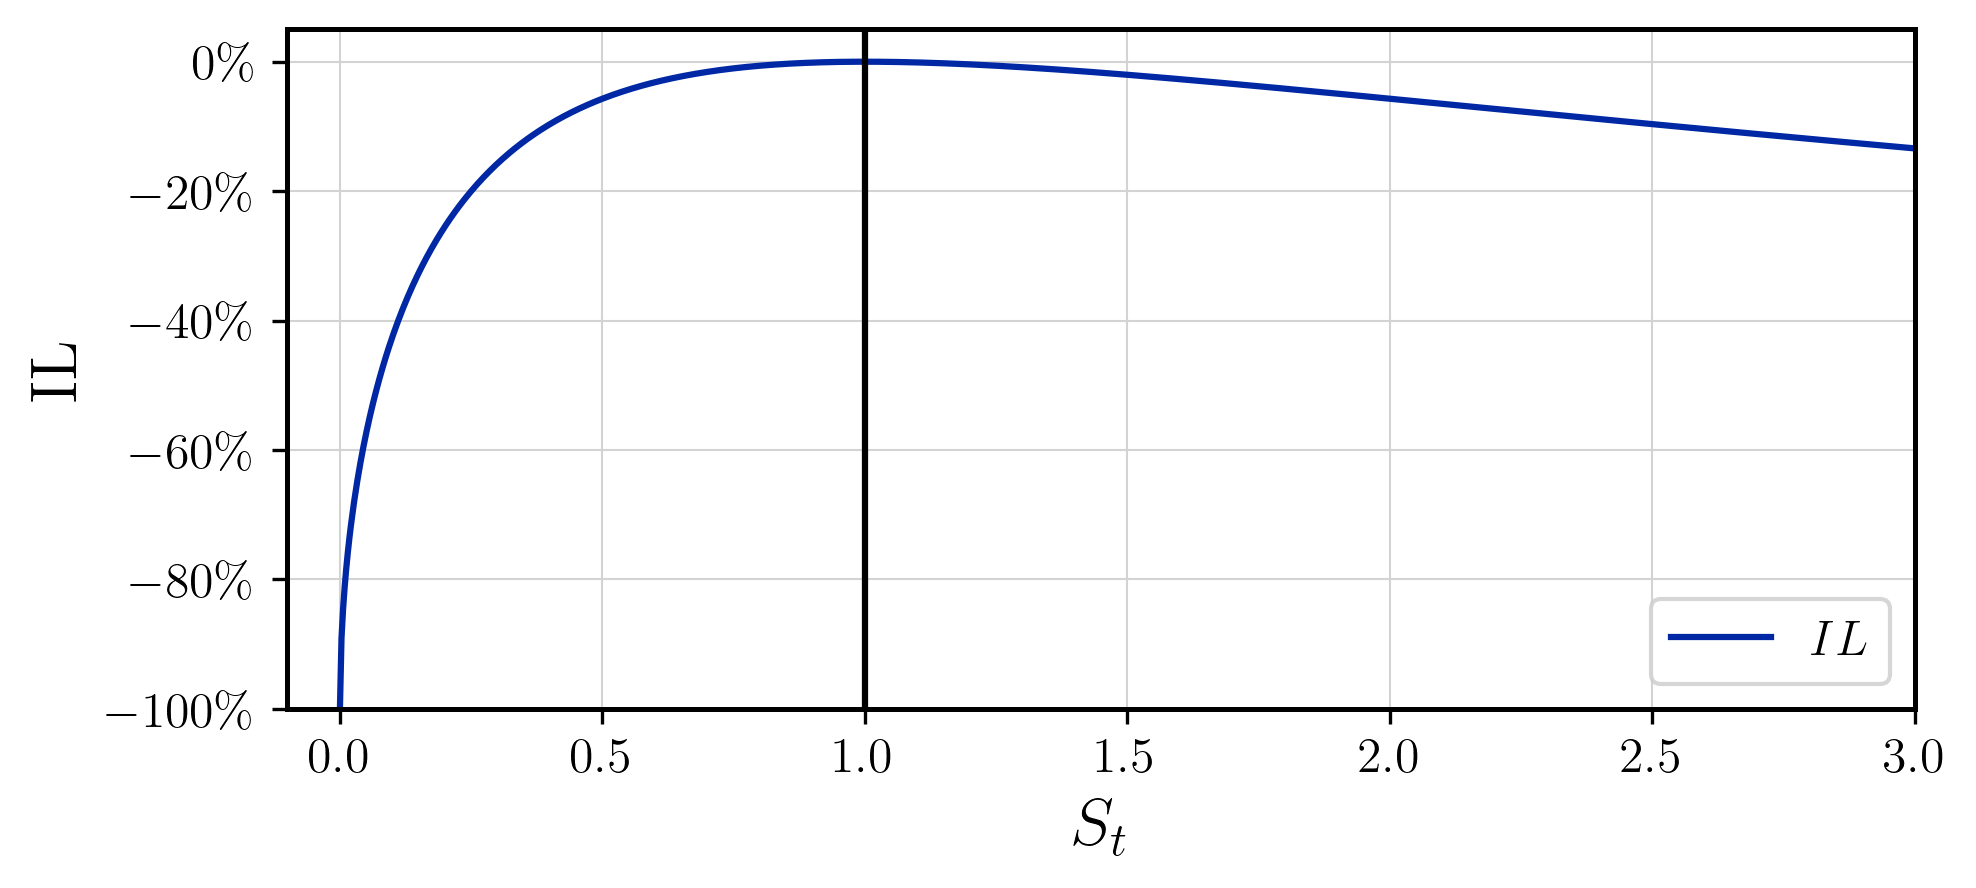

In [144]:
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(7,3),dpi =300)

ax.plot(x, impermanent_loss(x), label='$IL$')
ax.axvline(1, c = 'k')
ax.set_ylim(-1,0.05)
ax.set_xlim(-0.1,3)
ax.set_xlabel('$S_t$')
ax.set_ylabel('IL')
ax.legend()
ax.set_axisbelow(True)
ax.grid(zorder=100, lw =0.5, color = 'lightgray')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))

In [145]:
def PL_hedged(delta, L=1, p_0=1):
    return -1*L*(p_0**0.5)*((delta)**0.5-1)**2

def PL_funded(delta, L=1, p_0=1):
    return 2*L*(p_0**0.5)*((delta)**0.5-1)

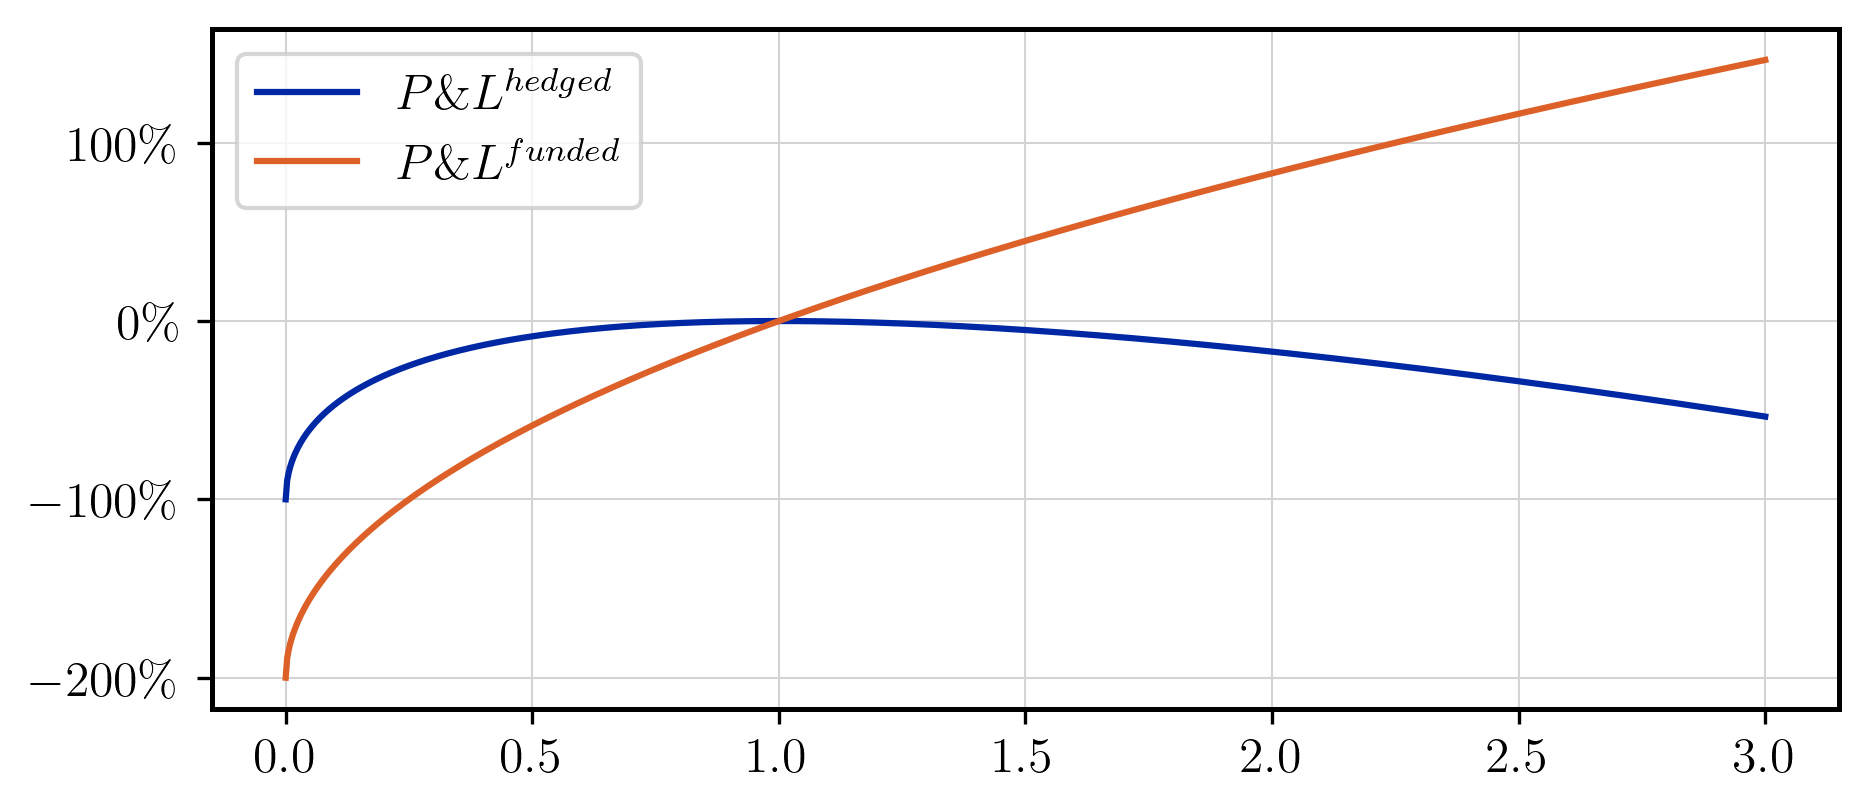

In [146]:
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(7,3),dpi =300)

ax.plot(x, PL_hedged(x), label='$P\&L^{hedged}$')
ax.plot(x, PL_funded(x), label='$P\&L^{funded}$')

ax.legend()
ax.set_axisbelow(True)
ax.grid(zorder=100, lw =0.5, color = 'lightgray')

ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))

In [150]:
y = np.array([1.05**x for x in range(10)])
x = np.array([x for x in range(10)])


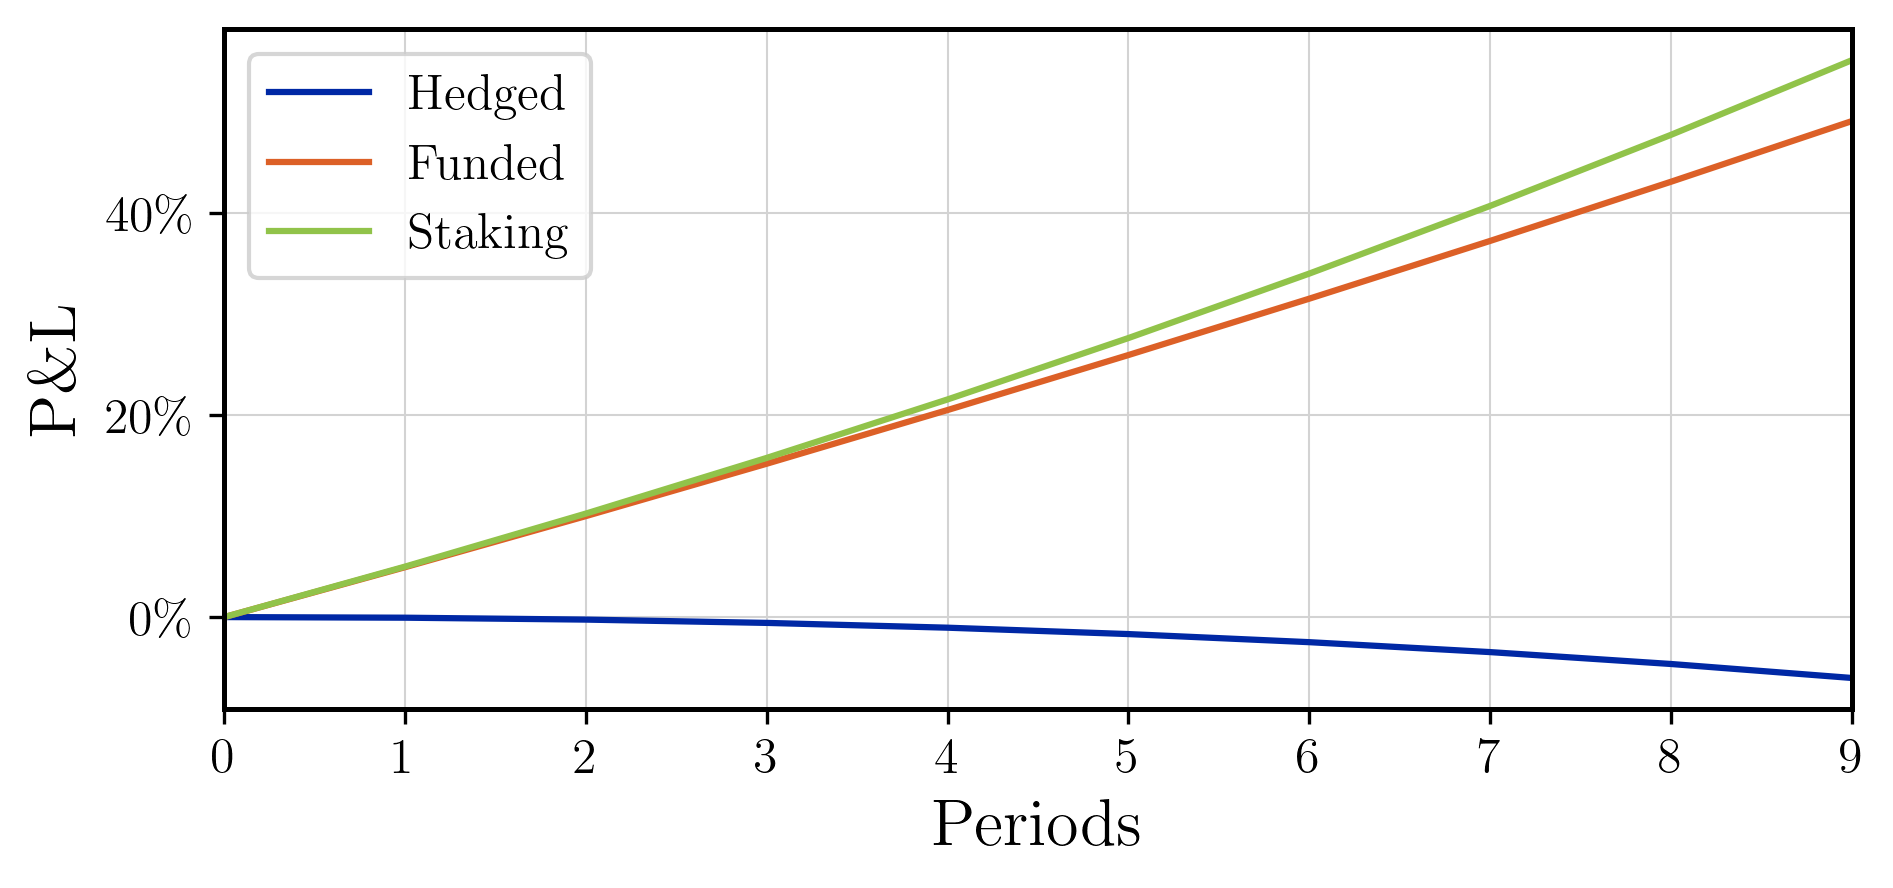

In [151]:
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(7,3),dpi =300)


ax.plot(x, PL_hedged(y), label='Hedged')
ax.plot(x, PL_funded(y), label='Funded')


y = np.array([1.05**x - 1 for x in range(10)])
ax.plot(x,y, label='Staking')
ax.legend()
ax.set_axisbelow(True)
ax.set_xlabel('Periods')
ax.set_ylabel('P\&L')
ax.set_xlim(0,9)
ax.grid(zorder=100, lw =0.5, color = 'lightgray')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))

In [153]:
periods = 10
x_01 = np.array([impermanent_loss(1.01**x) for x in range(periods)])
x_05 = np.array([impermanent_loss(1.05**x) for x in range(periods)])
x_10 = np.array([impermanent_loss(1.10**x) for x in range(periods)])
y = np.array([x for x in range(10)])

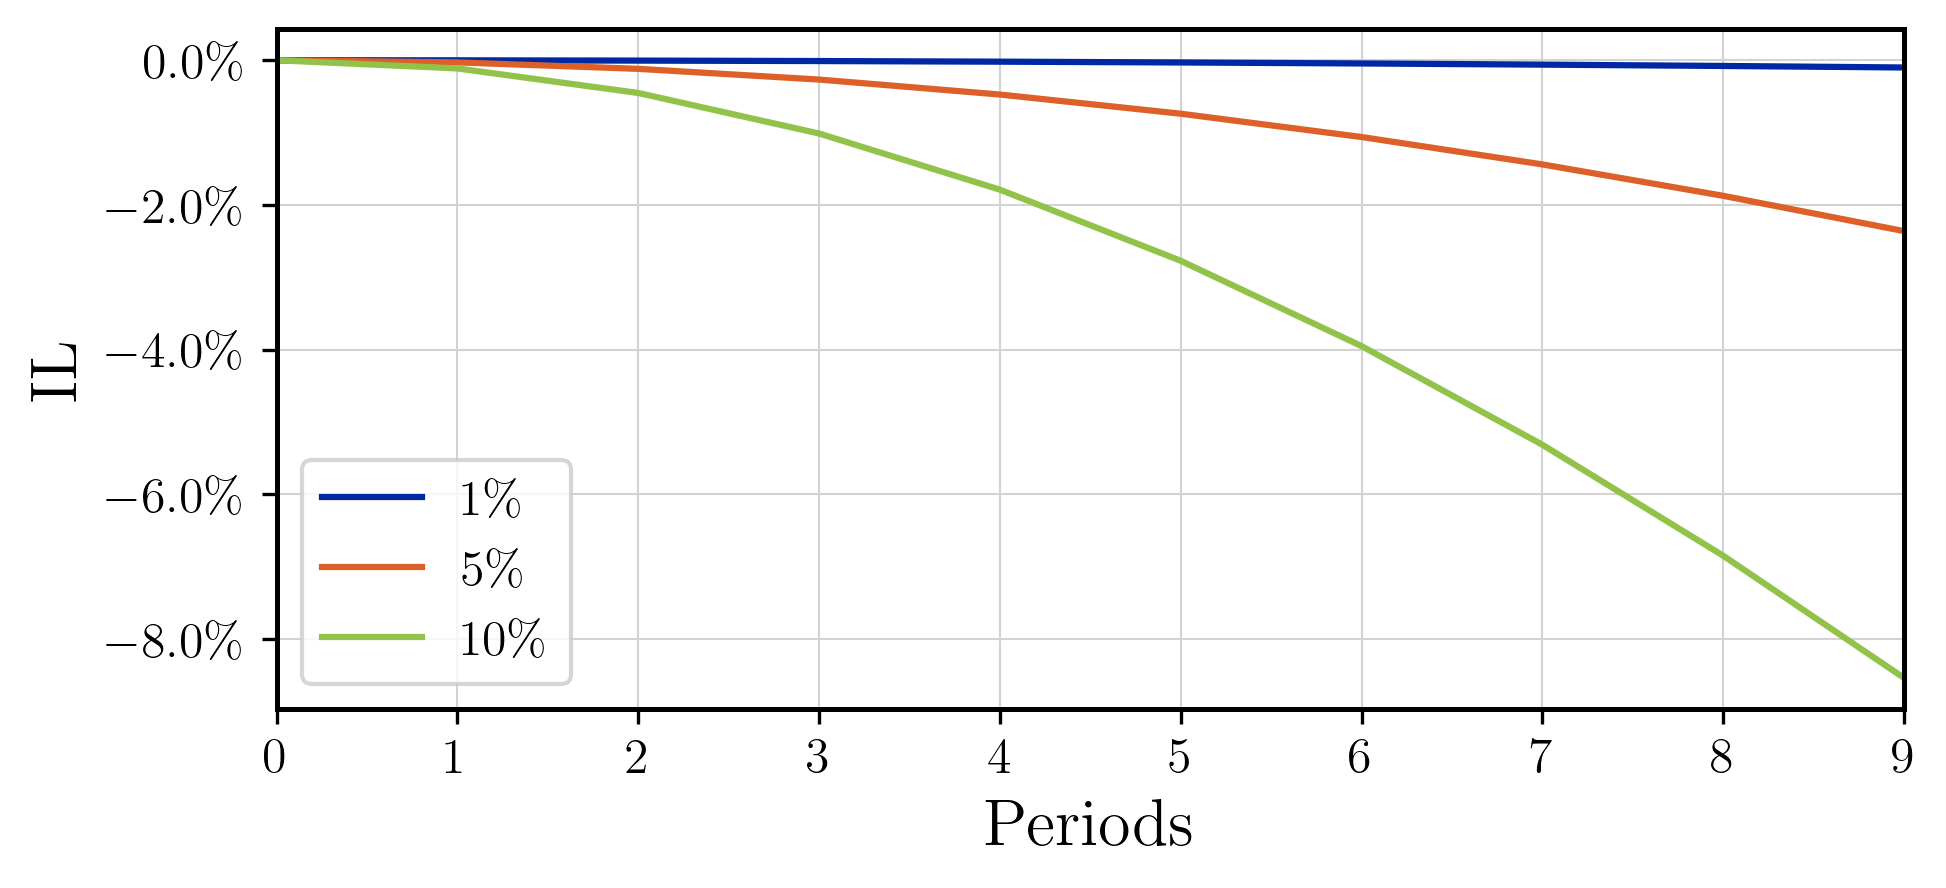

In [154]:
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(7,3),dpi =300)

ax.plot(y,x_01, label='1\%')
ax.plot(y,x_05, label='5\%')
ax.plot(y,x_10, label='10\%')
ax.legend()
ax.set_axisbelow(True)
ax.set_xlim(0,9)
ax.set_xlabel('Periods')
ax.set_ylabel('IL')
ax.grid(zorder=100, lw =0.5, color = 'lightgray')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))

In [171]:
def time_func(r, t=1):
    return ((1+(r/100))**(-1*(t/2)))-1

In [175]:
x=np.linspace(-100 ,5000,100)
y_01 = time_func(x)

/var/folders/4r/y8rtkym13fx1wcrtctrv0pp80000gn/T/ipykernel_12137/3492628998.py:2: RuntimeWarning: divide by zero encountered in power
  return ((1+(r/100))**(-1*(t/2)))-1


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


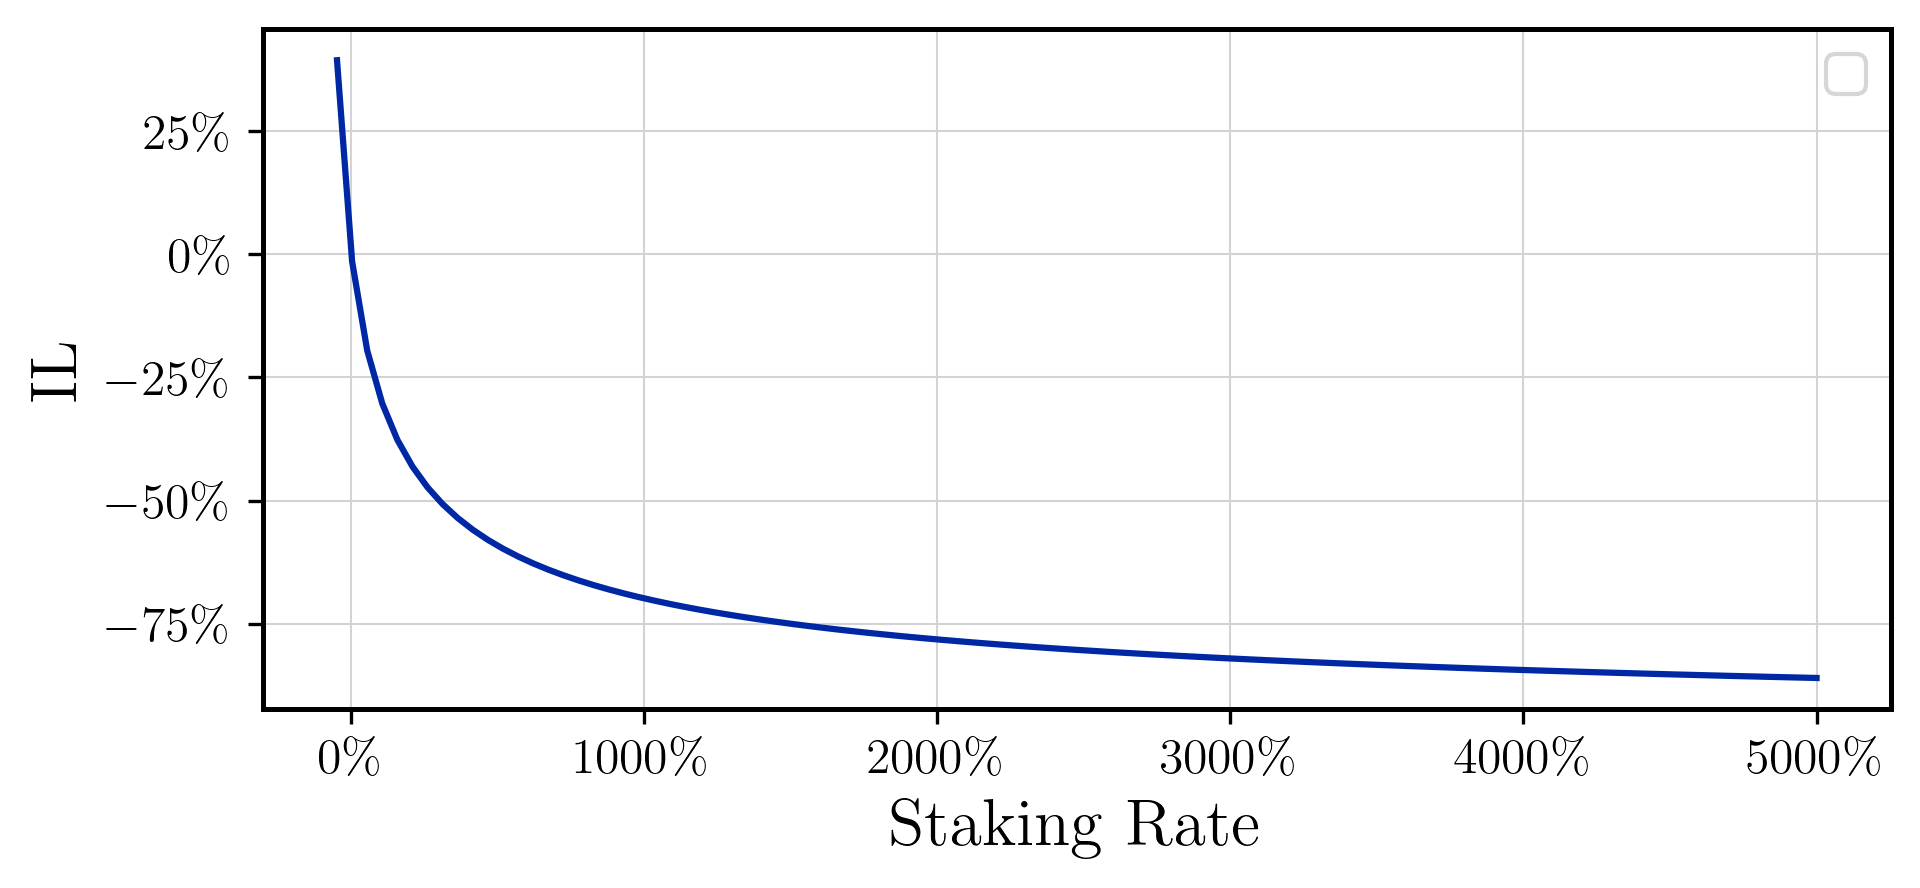

In [177]:
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(7,3),dpi =300)

ax.plot(x,y_01)
ax.legend()
ax.set_axisbelow(True)
#ax.set_xlim(-10,50)
ax.set_xlabel('Staking Rate')
ax.set_ylabel('IL')
ax.grid(zorder=100, lw =0.5, color = 'lightgray')
ax.xaxis.set_major_formatter(mtick.PercentFormatter(100))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))